# Tesis
## Diego Torres
En este notebook realizaremos un análisis a un conjunto de datos de pacientes con insuficiencia cardíaca, para desarrollar un algoritmo que pueda determinar las probobabiliades de incidencia de esta enfermedad mediante el uso de diferentes modelos predictivos, y luego se comparará su rendimiento para seleccionar el que tenga mayor porcentaje de acierto.

## Índice
1. [Análisis exploratorio de datos](#info)
2. [Preparación de los datos](#prepare)
3. [Modelos predictivos](#predict)
4. [Conclusión](#conclu)

<a id='info'></a>
# Análisis exploratorio de datos

### Importamos librerías y módulos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import watermark
%load_ext watermark
from sklearn.metrics import accuracy_score
import sklearn
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Leemos el conjunto de datos y obtenemos información sobre él <a id='df.info'></a>

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


><h4>Al parecer, no tenemos entradas vacías en nuestro conjunto de datos</h4>

### Echemos un vistazo a las columnas con las primeras entradas

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Entendamos cada columna de nuestro conjunto de datos y su distrubución:

### - Age: Edad del paciente

Text(0.5, 8.95999999999998, 'Edad')

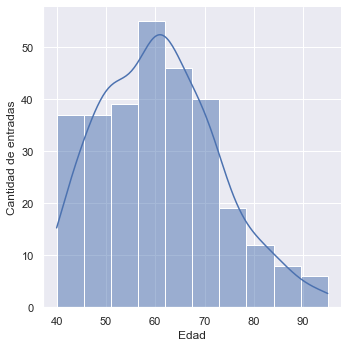

In [4]:
sns.displot(data=df['age'], kde=True)
plt.ylabel('Cantidad de entradas')
plt.xlabel('Edad')

### - Anaemia: Si el paciente sufre de anemia (Disminución de glóbulos rojos o hemoglobina) - 0 = No, 1 = Sí 

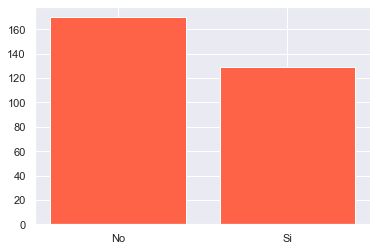

In [5]:
x = ['No', 'Si']
y = df['anaemia'].value_counts()
plt.bar(x, y, color='tomato')
plt.show()

In [6]:
df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

### - Creatinine_phosphokinase: Nivel de la enzima CPK en sangre (mcg / L)

<AxesSubplot:>

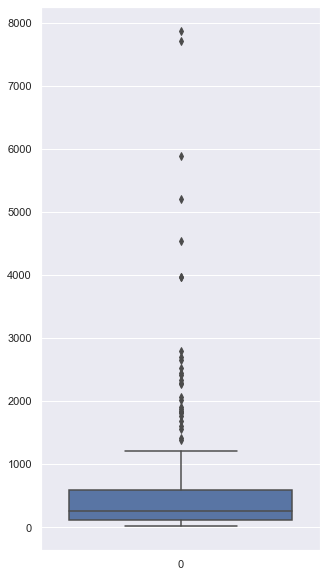

In [7]:

plt.figure(figsize=(5,10))
sns.boxplot(data=df['creatinine_phosphokinase'])


### - Diabetes: Si el paciente sufre de diabetes - 0 = No, 1 = Sí

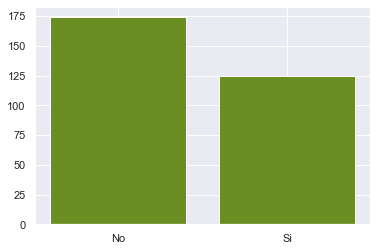

In [8]:
x = ['No', 'Si']
y = df['diabetes'].value_counts()
plt.bar(x, y, color='olivedrab')
plt.show()

In [9]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

### - Ejection_fraction: Porcentaje de sangre que sale del corazón en cada contracción (%)

Text(0.5, 8.95999999999998, 'sangre que eyecta el corazón (%)')

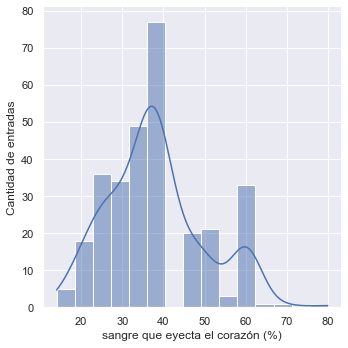

In [10]:
sns.displot(data=df['ejection_fraction'], kde=True)
plt.ylabel('Cantidad de entradas')
plt.xlabel('sangre que eyecta el corazón (%)')

### - High_blood_pressure: Si el paciente sure de hipertensión - 0 = No, 1 = Sí

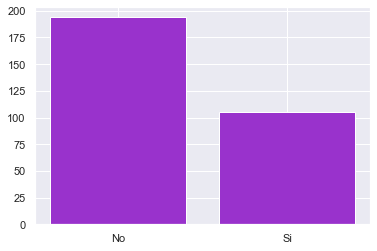

In [11]:
x = ['No', 'Si']
y = df['high_blood_pressure'].value_counts()
plt.bar(x, y, color='darkorchid')
plt.show()

In [12]:
df['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

### - Platelets: Plaquetas en la sangre (kiloplaquetas / mL)

Text(0, 0.5, 'Plaquetas (kiloplaquetas / mL)')

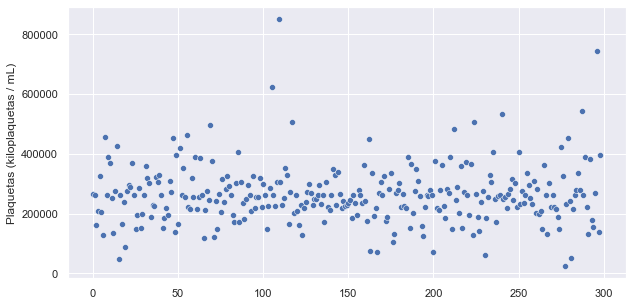

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df['platelets'])
plt.ylabel('Plaquetas (kiloplaquetas / mL)')

### - Serum_creatinine: Nivel de creatinina sérica en sangre (mg / dL)

Text(0, 0.5, 'Creatinina sérica (mg / dL)')

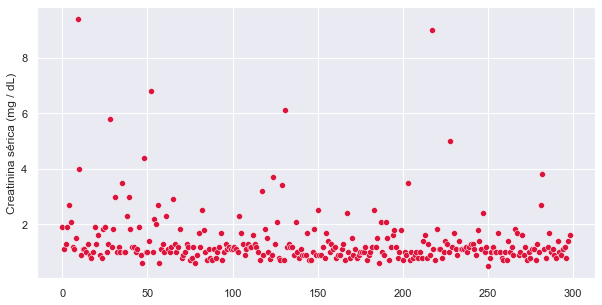

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df['serum_creatinine'], color='crimson')
plt.ylabel('Creatinina sérica (mg / dL)')

### - Serum_sodium: Nivel de sodio sérico en sangre (mEq / L)

Text(0.5, 0, 'Sodio sérico (mEq / L)')

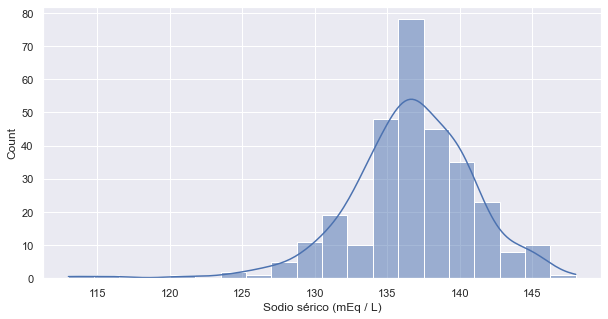

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(data=df['serum_sodium'], kde=True)
plt.xlabel('Sodio sérico (mEq / L)')

### - Sex: Género del paciente - Hombre = 1, Mujer = 0

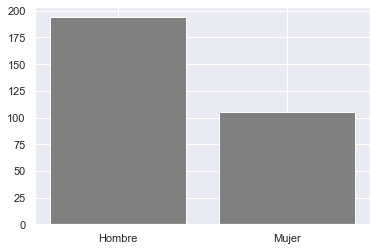

In [16]:
x = ['Hombre', 'Mujer']
y = df['sex'].value_counts()
plt.bar(x, y, color='gray')
plt.show()

### - Smoking: Si el paciente fuma o no - 0 = No, 1 = Sí

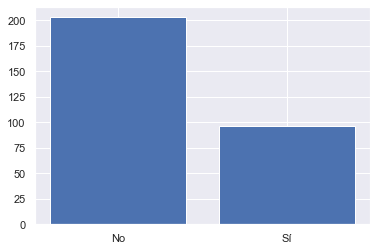

In [17]:
x = ['No', 'Sí']
y = df['smoking'].value_counts()
plt.bar(x, y)
plt.show()

In [18]:
df['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

### - Time: Período de seguimiento (días)

Text(0.5, 0, 'Período de seguimiento (días)')

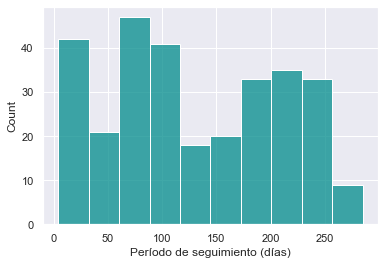

In [19]:
sns.histplot(data=df['time'], color='darkcyan')
plt.xlabel('Período de seguimiento (días)')

### - DEATH_EVENT: Si el paciente falleció durante el período de seguimiento (booleano) - 0 = No, 1 = Sí

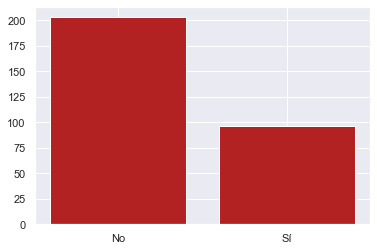

In [20]:
x = ['No', 'Sí']
y = df['DEATH_EVENT'].value_counts()
plt.bar(x, y, color='firebrick')
plt.show()

<a id='prepare'></a>
# Preparación de los datos

## Detección de entradas con valores nulos
Cuando observamos nuestro dataset en un principio, adelantamos que no contenía valores nulos. Comprobémoslo.

<AxesSubplot:>

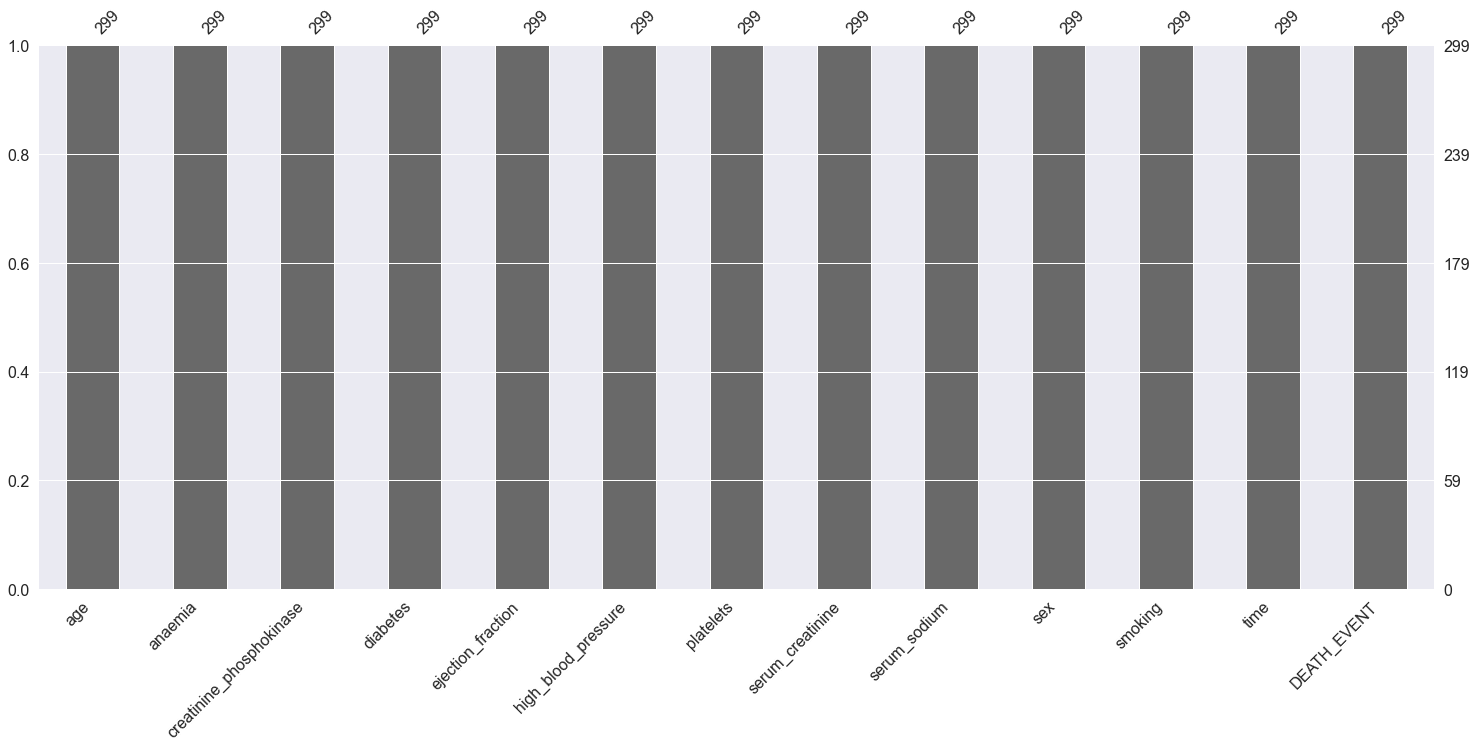

In [21]:
msno.bar(df)

><h4>Efectivamente, ninguna columna de nuestro conjunto de datos contiene entradas nulas </h4>

## Correlación

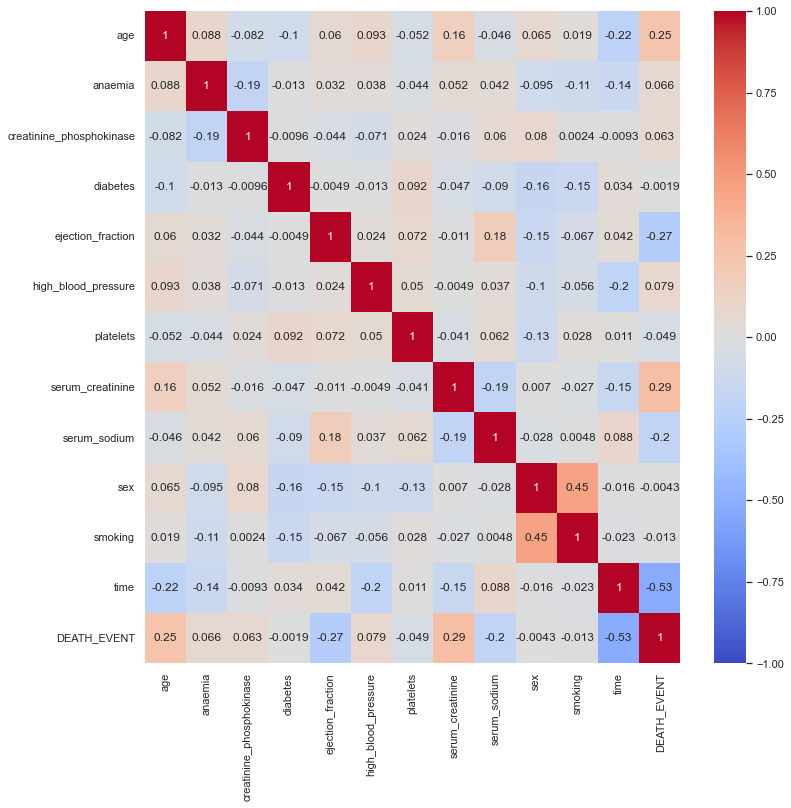

In [22]:
corr = df.corr()
ax, fig = plt.subplots(figsize=(12,12))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

><h4>En este mapa podemos observar que "time", "serum_sodium", "serum_creatinine", "ejection_fraction" y "age" tienen una correlación considerable con "DEATH_EVENT", nuestra variable objetivo.</h4>

### Dividimos los datos en entrenamiento y pruebas

In [23]:
#Columnas a usar
x = df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]

#Normalización estándar
x = (x-x.mean())/x.std()

#Variable objetivo
y = df['DEATH_EVENT']

#División de los datos
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

<a id='predict'></a>
# Modelos Predictivos

## Regresión logística

In [24]:
rl=LogisticRegression()

#Entrenamos el algoritmo
rl.fit(x_train,y_train)

#Relizamos la predicción
p1=rl.predict(x_test)

#Resultados
r1=accuracy_score(y_test,p1)
print("Precisión de la regresión logística:", "{:.2f}%".format(100*r1))
matriz=confusion_matrix(y_test, p1)
print("Matriz de confusión: ")
print(matriz)

Precisión de la regresión logística: 88.33%
Matriz de confusión: 
[[42  4]
 [ 3 11]]


## Máquina de vectores de soporte

In [25]:
mvs=SVC()

#Entrenamos el algoritmo
mvs.fit(x_train,y_train)

#Realizamos la predicción
p2=mvs.predict(x_test)

#Resultados
r2=accuracy_score(y_test,p2)
print("Precisión de máquina de vectores de soporte:", "{:.2f}%".format(100*r2))
matriz=confusion_matrix(y_test, p2)
print("Matriz de confusión: ")
print(matriz)

Precisión de máquina de vectores de soporte: 91.67%
Matriz de confusión: 
[[44  2]
 [ 3 11]]


## Árboles de decisión

In [39]:
ad=DecisionTreeClassifier(criterion='entropy')

#Entrenamos al modelo
ad.fit(x_train,y_train)

#Realizamos la predicción
p3=ad.predict(x_test)

#Resultados
r3=accuracy_score(y_test,p3)
print("Precisión de Árboles de decisión:", "{:.2f}%".format(100*r3))
matriz=confusion_matrix(y_test, p3)
print("Matriz de confusión: ")
print(matriz)

Precisión de Árboles de decisión: 90.00%
Matriz de confusión: 
[[43  3]
 [ 3 11]]


## Bosques aleatorios

In [33]:
ba=RandomForestClassifier()

#Entrenamos el algoritmo
ba.fit(x_train,y_train)

#Realizamos la predicción
p4=ba.predict(x_test)

#Resultados
r4=accuracy_score(y_test,p4)
print("Precisión de bosques aleatorios:", "{:.2f}%".format(100*r4))
matriz=confusion_matrix(y_test, p4)
print("Matriz de confusión: ")
print(matriz)

Precisión de bosques aleatorios: 91.67%
Matriz de confusión: 
[[43  3]
 [ 2 12]]


## Potenciación del gradiente

In [28]:
pg=GradientBoostingClassifier()

#Entrenamos el algoritmo
pg.fit(x_train,y_train)

#Realizamos la predicción
p5=pg.predict(x_test)

#Resultados
r5=accuracy_score(y_test,p5)
print("Precisión de potenciación del gradiente:", "{:.2f}%".format(100*r5))
matriz=confusion_matrix(y_test, p4)
print("Matriz de confusión: ")
print(matriz)

Precisión de potenciación del gradiente: 85.00%
Matriz de confusión: 
[[41  5]
 [ 2 12]]


<a id='conclu'></a>
# Conclusión

## IGNORE: printing dependencies

In [29]:
%watermark --iversions

sklearn   : 1.0.1
numpy     : 1.21.4
watermark : 2.2.0
matplotlib: 3.5.0
pandas    : 1.3.4
missingno : 0.5.0
seaborn   : 0.11.2

